In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread
from math import sqrt

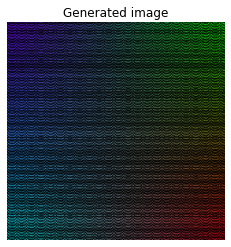

In [11]:

def generate_fabric_pattern_image(width, height, colors):
    pattern_image = np.zeros((height, width, 3), dtype=np.uint8)
    # Define colors at certain points
    color1 = colors[0]
    color2 = colors[1]
    color3 = colors[2]
    color4 = colors[3]

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            r = int((color1[0] * (height) * (width - x) + color2[0] * (height - y) * x + color3[0] * y * x + color4[0] * y * ( x)) / (width * height))
            g = int((color1[1] * (height - y) * (width - x) + color2[1] * (height - y) * x + color3[1] * y * x + color4[1] * y * (width - x)) / (width * height))
            b = int((color1[2] * (height - y) * (width - x) + color2[2] * (height - y) * x + color3[2] * y * x + color4[2] * y * (width - x)) / (width * height))

            # Add lines to simulate cloth strands
            line_intensity =  np.sin(x*x-y) + 0.5 * np.cos(y *y+x/(y+1)/ 50) 
            line_intensity = np.clip(line_intensity, 0, 1)  # Ensure intensity is within valid range
            r = int(r * line_intensity)
            g = int(g * line_intensity)
            b = int(b * line_intensity)
            # Ensure color values are within the valid range (0-255)
            r = max(0, min(255, r))
            g = max(0, min(255, g))
            b = max(0, min(255, b))

            pattern_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return pattern_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 110), (0, 255, 0), (0, 0, 255), (25, 255, 0)] 
pattern_image = generate_fabric_pattern_image(width, height, colors)

# Display the generated image
plt.axis('off')
plt.title('Generated image')
plt.imshow(pattern_image)





Text(0.5, 1.0, 'Only Blue from og image')

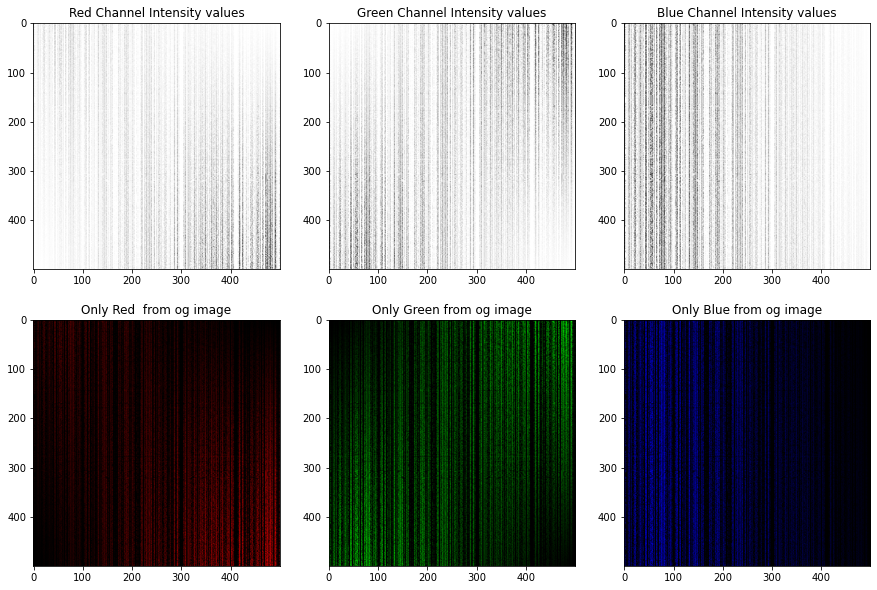

In [3]:
# Separate channels
red_channel = pattern_image[:, :, 0]  
green_channel = pattern_image[:, :, 1]
blue_channel = pattern_image[:, :, 2]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0,0].imshow(red_channel,cmap='Greys')
axs[0,0].set_title('Red Channel Intensity values')
axs[0,1].imshow(green_channel,cmap='Greys')
axs[0,1].set_title('Green Channel Intensity values')
axs[0,2].imshow(blue_channel,cmap='Greys')
axs[0,2].set_title('Blue Channel Intensity values')

pattern_image_redcolored=np.zeros((pattern_image.shape[0],pattern_image.shape[1],3),dtype=int)
pattern_image_greencolored=np.zeros((pattern_image.shape[0],pattern_image.shape[1],3),dtype=int)
pattern_image_bluecolored=np.zeros((pattern_image.shape[0],pattern_image.shape[1],3),dtype=int)

pattern_image_redcolored[:,:,0]=red_channel
pattern_image_greencolored[:,:,1]=green_channel
pattern_image_bluecolored[:,:,2]=blue_channel

axs[1,0].imshow(pattern_image_redcolored)
axs[1,0].set_title('Only Red  from og image')
axs[1,1].imshow(pattern_image_greencolored)
axs[1,1].set_title('Only Green from og image')
axs[1,2].imshow(pattern_image_bluecolored)
axs[1,2].set_title('Only Blue from og image')

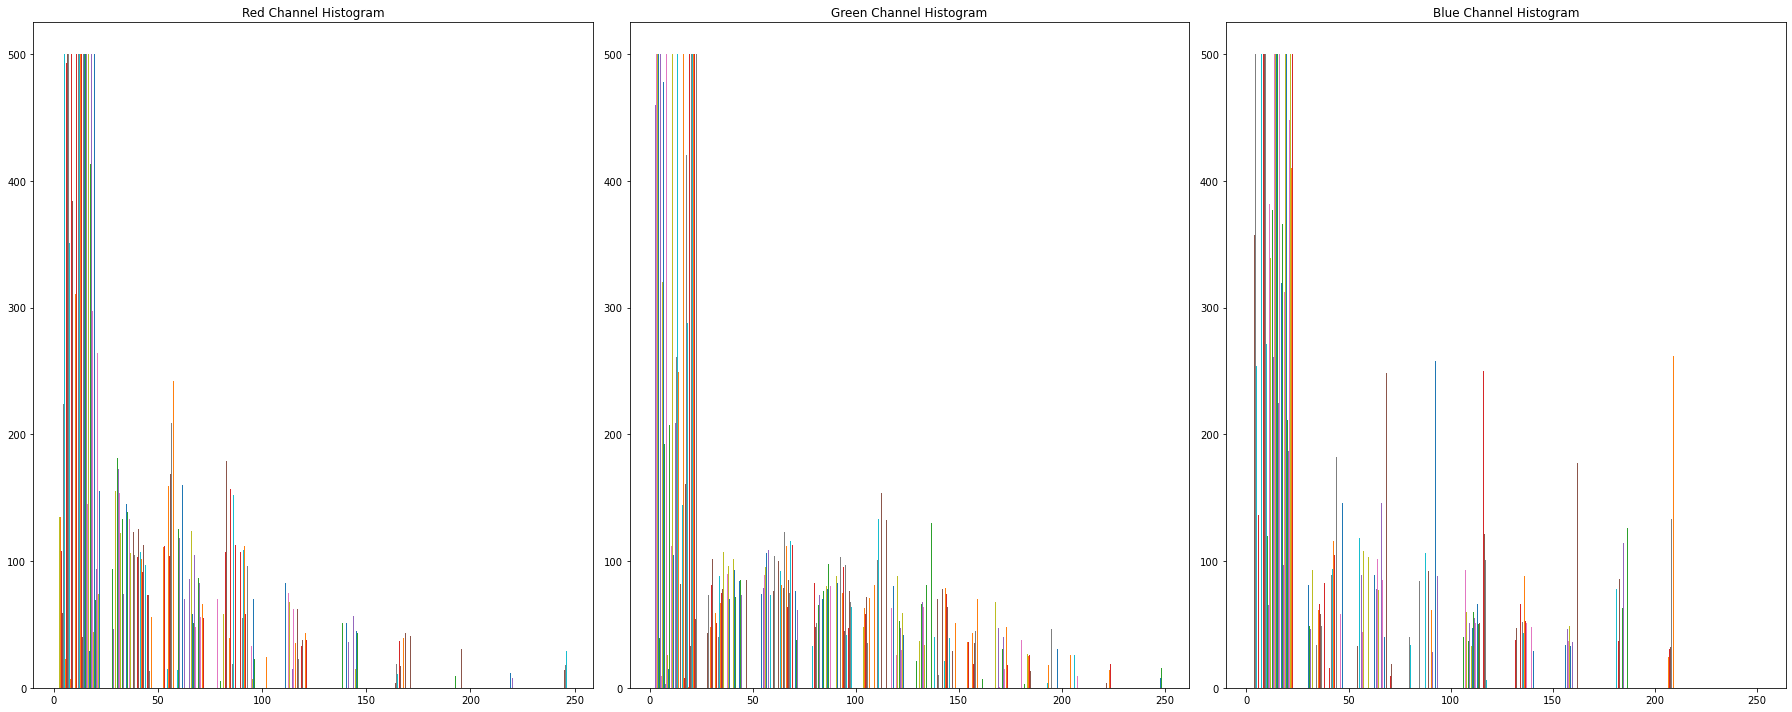

In [4]:
# Plot the histograms using matplotlib
# using np.histogram is to put suitable bin ranges in bin_r according to the values of in the np array

#No reversal in channels bec it is generated not imread by opencv
hist_r, bins_r=np.histogram(pattern_image[:,:,0]) #r 
hist_g, bins_g=np.histogram(pattern_image[:,:,1]) #g 
hist_b, bins_b=np.histogram(pattern_image[:,:,2]) #b 

fig, axs = plt.subplots(1, 3, figsize=(25, 10))


axs[0].hist(pattern_image[:,:,0], bins=bins_r)
axs[0].set_title('Red Channel Histogram')

axs[1].hist(pattern_image[:,:,1], bins=bins_g)
axs[1].set_title('Green Channel Histogram')

axs[2].hist(pattern_image[:,:,2], bins=bins_b)
axs[2].set_title('Blue Channel Histogram')


# When you pass a 2D NumPy array to plt.hist, it indeed creates a separate bin for each value in the array


# axs[0].hist(pattern_image[:,:,0].flatten(), bins=bins_r, color='red', alpha=0.5) # it shows one bar for each bin range

# import pandas as pd
# pd.Series(pattern_image.flatten()).plot(kind='hist',bins=10,title="new hist",color='black')
# plt.show()
plt.tight_layout()
plt.show()

In [5]:
# Calculate mean and standard deviation of the whole image
mean_value = np.mean(pattern_image)
std_deviation = np.std(pattern_image)
print(f"Mean of the whole image: {mean_value}")
print(f"Standard deviation of the whole image: {std_deviation}")

Mean of the whole image: 36.088074666666664
Standard deviation of the whole image: 52.69929775800077
